<a href="https://colab.research.google.com/github/mottasilvia/UCU-NLP/blob/main/NLP_Grafos_de_conocimiento_actividad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema : Grafos de Conocimiento
Actividad 2 - Investigar las bibliotecas NetworkX, RDFLib, SpaCy
- NetworkX: Para crear y manejar grafos.
- RDFLib: Para trabajar con datos RDF.
- spaCy: Para procesamiento de lenguaje natural.


In [32]:
import spacy
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/movies_example_100.csv
/content/wiki_sentences_v2.csv
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/default_configs.db
/content/.config/gce
/content/.config/.last_survey_prompt.yaml
/content/.config/active_config
/content/.config/logs/2024.07.03/13.21.17.423948.log
/content/.config/logs/2024.07.03/13.21.06.973090.log
/content/.config/logs/2024.07.03/13.21.16.833904.log
/content/.config/logs/2024.07.03/13.20.35.159584.log
/content/.config/logs/2024.07.03/13.21.05.878640.log
/content/.config/logs/2024.07.03/13.20.56.007311.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv


In [33]:
import pandas as pd
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Crear listas de datos de ejemplo
movies = ['Inception', 'The Dark Knight', 'Interstellar', 'Dunkirk', 'Tenet', 'Memento', 'The Prestige', 'Batman Begins', 'The Dark Knight Rises', 'Insomnia']
directors = ['Christopher Nolan', 'Steven Spielberg', 'Quentin Tarantino', 'Martin Scorsese', 'James Cameron', 'Peter Jackson', 'Ridley Scott', 'Francis Ford Coppola', 'Stanley Kubrick', 'Alfred Hitchcock']
actors = ['Leonardo DiCaprio', 'Christian Bale', 'Matthew McConaughey', 'Fionn Whitehead', 'John David Washington', 'Tom Hardy', 'Anne Hathaway', 'Joseph Gordon-Levitt', 'Marion Cotillard', 'Michael Caine']

# Generar 100 registros aleatorios con actores adicionales
data = {
    'movie_title': [random.choice(movies) for _ in range(100)],
    'director_name': [random.choice(directors) for _ in range(100)],
    'actor_1_name': [random.choice(actors) for _ in range(100)],
    'actor_2_name': [random.choice(actors) for _ in range(100)],
    'actor_3_name': [random.choice(actors) for _ in range(100)]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV
file_path = '/content/movies_example_100.csv'
df.to_csv(file_path, index=False)

file_path


'/content/movies_example_100.csv'

In [34]:
data = pd.read_csv("/content/movies_example_100.csv")
print(df.shape)
data.head(3)

(100, 5)


,movie_title,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insomnia,Christopher Nolan,Joseph Gordon-Levitt,Matthew McConaughey,Anne Hathaway
1,Interstellar,Francis Ford Coppola,Tom Hardy,Fionn Whitehead,Matthew McConaughey
2,The Dark Knight,Ridley Scott,Tom Hardy,Matthew McConaughey,Matthew McConaughey


#  Crea un grafo utilizando NetworkX a partir del conjunto de datos cargado.

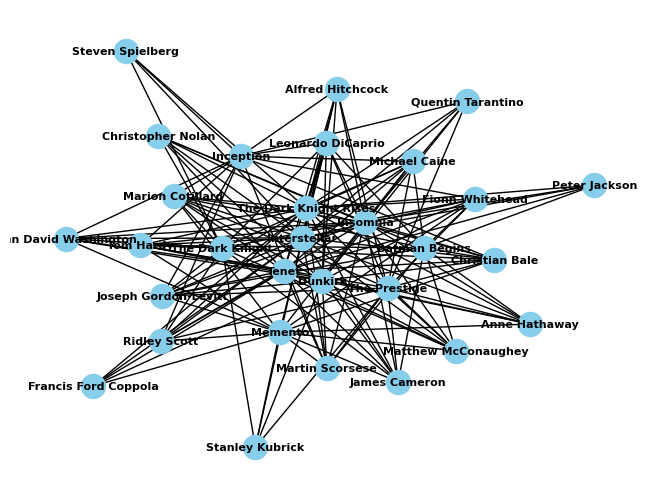

In [35]:
import networkx as nx

# Crear un grafo vacío
G = nx.Graph()

# Añadir nodos y aristas al grafo
for index, row in data.iterrows():
    G.add_node(row['movie_title'], type='movie')
    G.add_node(row['director_name'], type='director')
    G.add_edge(row['movie_title'], row['director_name'], relation='directed_by')

    for actor in ['actor_1_name', 'actor_2_name', 'actor_3_name']:
        if pd.notna(row[actor]):
            G.add_node(row[actor], type='actor')
            G.add_edge(row['movie_title'], row[actor], relation='acted_in')

# Visualización básica del grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=300, node_color="skyblue", font_size=8, font_weight="bold")
plt.show()


In [44]:
# Listar todas las aristas con sus atributos
edges = G.edges(data=True)
for edge in edges:
    print(edge)

('Insomnia', 'Christopher Nolan', {'relation': 'directed_by'})
('Insomnia', 'Joseph Gordon-Levitt', {'relation': 'acted_in'})
('Insomnia', 'Matthew McConaughey', {'relation': 'acted_in'})
('Insomnia', 'Anne Hathaway', {'relation': 'acted_in'})
('Insomnia', 'Martin Scorsese', {'relation': 'directed_by'})
('Insomnia', 'Tom Hardy', {'relation': 'acted_in'})
('Insomnia', 'Michael Caine', {'relation': 'acted_in'})
('Insomnia', 'Leonardo DiCaprio', {'relation': 'acted_in'})
('Insomnia', 'Alfred Hitchcock', {'relation': 'directed_by'})
('Insomnia', 'John David Washington', {'relation': 'acted_in'})
('Insomnia', 'Marion Cotillard', {'relation': 'acted_in'})
('Insomnia', 'Christian Bale', {'relation': 'acted_in'})
('Insomnia', 'Peter Jackson', {'relation': 'directed_by'})
('Insomnia', 'Ridley Scott', {'relation': 'directed_by'})
('Insomnia', 'Quentin Tarantino', {'relation': 'directed_by'})
('Insomnia', 'James Cameron', {'relation': 'directed_by'})
('Christopher Nolan', 'The Dark Knight', {'rel

# Extraer entidades y relaciones de texto sin estructurar utilizando spaCy

In [36]:
!pip install spacy
!python -m spacy download es_core_news_md



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 19.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [39]:
import spacy

# Cargar el modelo de spaCy para español
nlp = spacy.load("es_core_news_md")

# Texto de ejemplo
texto = "Leonardo DiCaprio actuó en la película Inception dirigida por Christopher Nolan."

# Procesar el texto
doc = nlp(texto)


In [40]:
def extraer_entidades_y_relaciones(doc):
    entidades = []
    relaciones = []

    for ent in doc.ents:
        entidades.append((ent.text, ent.label_))

    for token in doc:
        if token.dep_ in ("nsubj", "dobj"):
            relacion = {
                "origen": token.head.text,
                "relacion": token.dep_,
                "destino": token.text
            }
            relaciones.append(relacion)

    return entidades, relaciones

# Extraer entidades y relaciones del texto procesado
entidades, relaciones = extraer_entidades_y_relaciones(doc)
print("Entidades:", entidades)
print("Relaciones:", relaciones)


Entidades: [('Leonardo DiCaprio', 'PER'), ('Inception', 'MISC'), ('Christopher Nolan', 'PER')]
Relaciones: [{'origen': 'actuó', 'relacion': 'nsubj', 'destino': 'Leonardo'}]


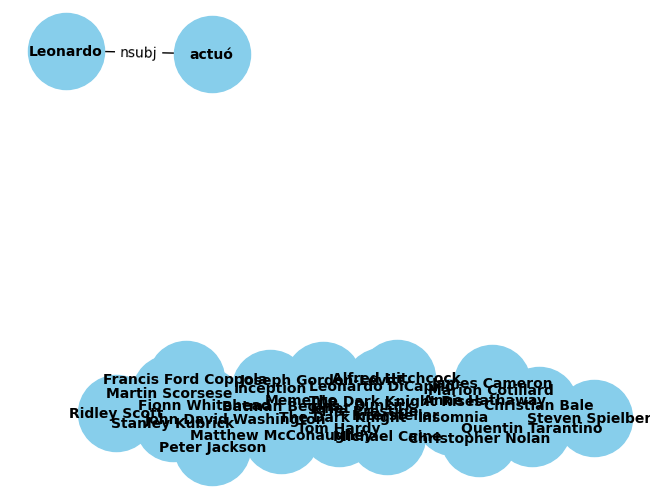

In [31]:
# Añadir entidades y relaciones al grafo
for entidad in entidades:
    G.add_node(entidad[0], type=entidad[1])

for relacion in relaciones:
    G.add_edge(relacion["origen"], relacion["destino"], relation=relacion["relacion"])

# Visualización del grafo actualizado
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [41]:
from networkx.algorithms import community

# Usar el algoritmo de detección de comunidades de Girvan-Newman
comp = community.girvan_newman(G)
comunidades = tuple(sorted(c) for c in next(comp))
print("Comunidades en el grafo:", comunidades)


Comunidades en el grafo: (['Alfred Hitchcock', 'Anne Hathaway', 'Batman Begins', 'Christian Bale', 'Christopher Nolan', 'Dunkirk', 'Fionn Whitehead', 'Francis Ford Coppola', 'Inception', 'Insomnia', 'Interstellar', 'James Cameron', 'John David Washington', 'Joseph Gordon-Levitt', 'Leonardo DiCaprio', 'Marion Cotillard', 'Martin Scorsese', 'Matthew McConaughey', 'Memento', 'Michael Caine', 'Peter Jackson', 'Quentin Tarantino', 'Ridley Scott', 'Stanley Kubrick', 'Tenet', 'The Dark Knight', 'The Dark Knight Rises', 'The Prestige', 'Tom Hardy'], ['Steven Spielberg'])


       movie_title         director_name          actor_1_name  \
0         Insomnia     Christopher Nolan  Joseph Gordon-Levitt   
1     Interstellar  Francis Ford Coppola             Tom Hardy   
2  The Dark Knight          Ridley Scott             Tom Hardy   
3  The Dark Knight     Christopher Nolan      Marion Cotillard   
4     Interstellar         Peter Jackson   Matthew McConaughey   

          actor_2_name         actor_3_name  
0  Matthew McConaughey        Anne Hathaway  
1      Fionn Whitehead  Matthew McConaughey  
2  Matthew McConaughey  Matthew McConaughey  
3     Marion Cotillard  Matthew McConaughey  
4     Marion Cotillard    Leonardo DiCaprio  
Entidades: [('Leonardo DiCaprio', 'PER'), ('Inception', 'MISC'), ('Christopher Nolan', 'PER')]
Relaciones: [{'origen': 'actuó', 'relacion': 'nsubj', 'destino': 'Leonardo'}]


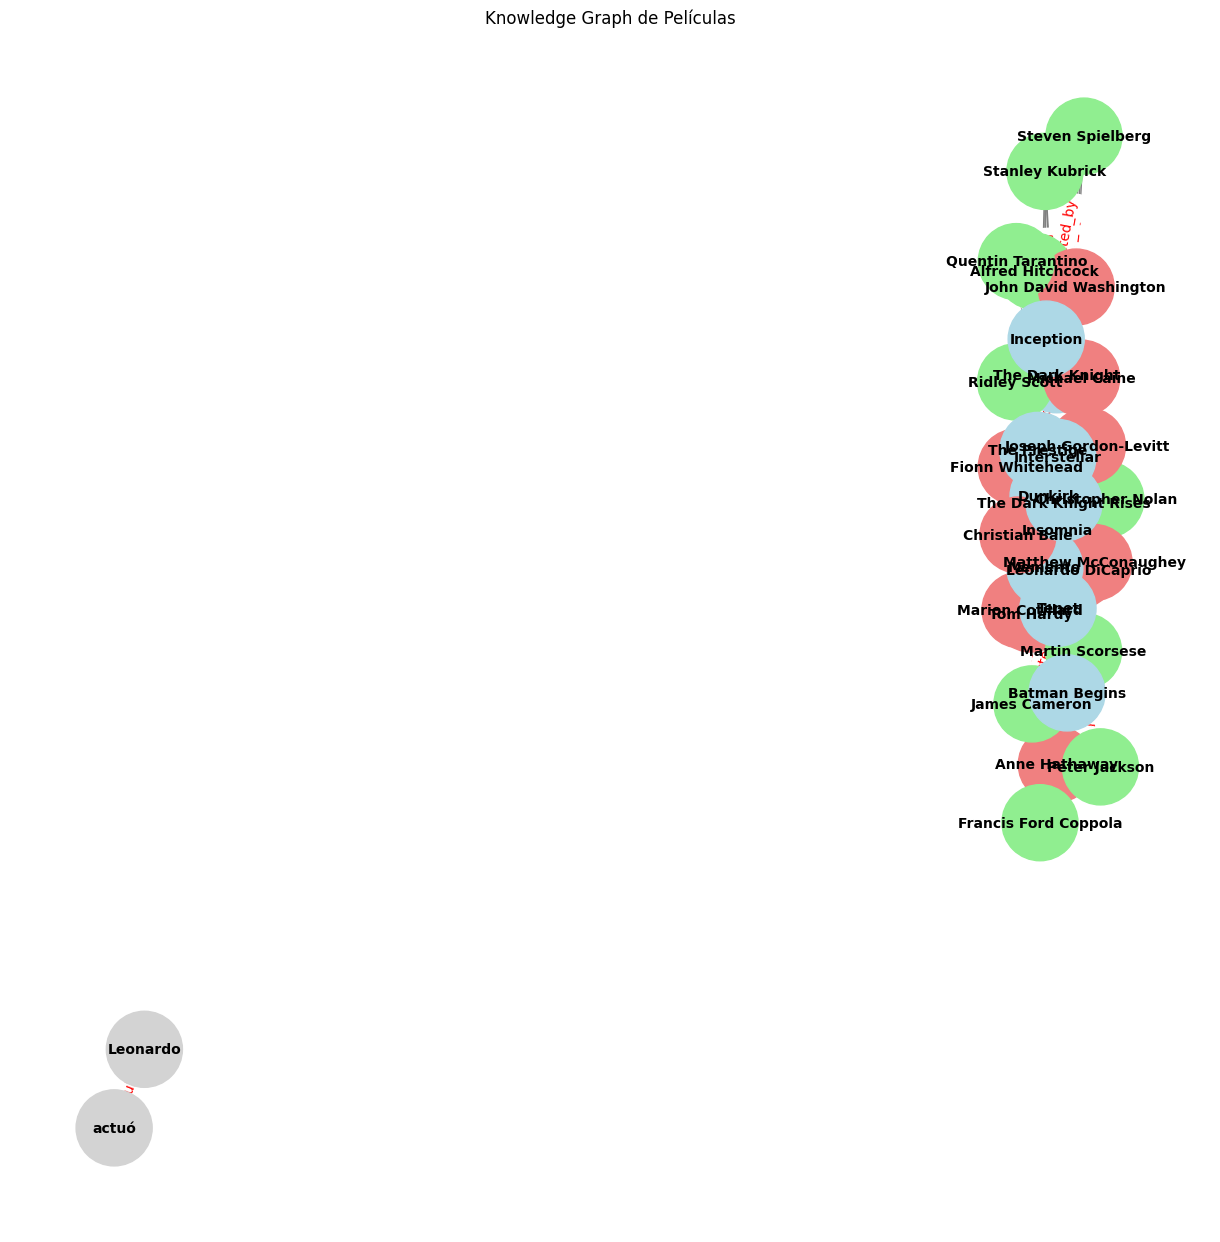

Comunidades en el grafo: (['Alfred Hitchcock', 'Anne Hathaway', 'Batman Begins', 'Christian Bale', 'Christopher Nolan', 'Dunkirk', 'Fionn Whitehead', 'Francis Ford Coppola', 'Inception', 'Insomnia', 'Interstellar', 'James Cameron', 'John David Washington', 'Joseph Gordon-Levitt', 'Leonardo DiCaprio', 'Marion Cotillard', 'Martin Scorsese', 'Matthew McConaughey', 'Memento', 'Michael Caine', 'Peter Jackson', 'Quentin Tarantino', 'Ridley Scott', 'Stanley Kubrick', 'Tenet', 'The Dark Knight', 'The Dark Knight Rises', 'The Prestige', 'Tom Hardy'], ['Steven Spielberg'], ['Leonardo', 'actuó'])
('Insomnia', 'Christopher Nolan', {'relation': 'directed_by'})
('Insomnia', 'Joseph Gordon-Levitt', {'relation': 'acted_in'})
('Insomnia', 'Matthew McConaughey', {'relation': 'acted_in'})
('Insomnia', 'Anne Hathaway', {'relation': 'acted_in'})
('Insomnia', 'Martin Scorsese', {'relation': 'directed_by'})
('Insomnia', 'Tom Hardy', {'relation': 'acted_in'})
('Insomnia', 'Michael Caine', {'relation': 'acted_

In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import spacy

# Paso 2: Cargar el dataset

print(data.head())

# Paso 3: Crear nodos y aristas utilizando NetworkX
G = nx.Graph()
for index, row in data.iterrows():
    G.add_node(row['movie_title'], type='movie')
    G.add_node(row['director_name'], type='director')
    G.add_edge(row['movie_title'], row['director_name'], relation='directed_by')
    for actor in ['actor_1_name', 'actor_2_name', 'actor_3_name']:
        if actor in row and pd.notna(row[actor]):
            G.add_node(row[actor], type='actor')
            G.add_edge(row['movie_title'], row[actor], relation='acted_in')

# Paso 4a: Extraer entidades y relaciones de texto sin estructurar utilizando spaCy
nlp = spacy.load("es_core_news_md")
texto = "Leonardo DiCaprio actuó en la película Inception dirigida por Christopher Nolan."
doc = nlp(texto)

def extraer_entidades_y_relaciones(doc):
    entidades = []
    relaciones = []

    for ent in doc.ents:
        entidades.append((ent.text, ent.label_))

    for token in doc:
        if token.dep_ in ("nsubj", "dobj"):
            relacion = {
                "origen": token.head.text,
                "relacion": token.dep_,
                "destino": token.text
            }
            relaciones.append(relacion)

    return entidades, relaciones

# Extraer entidades y relaciones del texto procesado
entidades, relaciones = extraer_entidades_y_relaciones(doc)
print("Entidades:", entidades)
print("Relaciones:", relaciones)

# Paso 4b: Añadir estas entidades y relaciones al Knowledge Graph teniendo en cuenta las relaciones existentes
for entidad in entidades:
    if entidad[0] not in G:
        G.add_node(entidad[0], type=entidad[1])

for relacion in relaciones:
    origen, destino = relacion["origen"], relacion["destino"]
    if G.has_edge(origen, destino):
        print(f"Ya existe una relación entre {origen} y {destino}: {G[origen][destino]}")
    else:
        G.add_edge(origen, destino, relation=relacion["relacion"])

# Definir colores para los diferentes tipos de nodos
color_map = []
for node in G:
    if G.nodes[node].get('type') == 'movie':
        color_map.append('lightblue')
    elif G.nodes[node].get('type') == 'director':
        color_map.append('lightgreen')
    elif G.nodes[node].get('type') == 'actor':
        color_map.append('lightcoral')
    elif G.nodes[node].get('type') == 'person':
        color_map.append('lightyellow')
    else:
        color_map.append('lightgrey')

# Visualización del grafo actualizado con mejoras
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)  # Ajustar el parámetro k para una mejor distribución
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=color_map, font_size=10, font_weight="bold", edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title("Knowledge Graph de Películas")
plt.show()

# Paso 6: Clusterizar el grafo
from networkx.algorithms import community
comp = community.girvan_newman(G)
comunidades = tuple(sorted(c) for c in next(comp))
print("Comunidades en el grafo:", comunidades)

# Listar todas las aristas con sus atributos
edges = G.edges(data=True)
for edge in edges:
    print(edge)


##¿Qué es un Gráfico de Conocimiento?

Un Gráfico de Conocimiento es un conjunto de puntos de datos conectados por relaciones que describen un dominio, por ejemplo, un negocio, una organización o un campo de estudio. Es una forma poderosa de representar datos porque los Gráficos de Conocimiento pueden construirse automáticamente y luego explorarse para revelar nuevos conocimientos sobre el dominio.

El concepto de los Gráficos de Conocimiento toma prestado de la Teoría de Grafos. En esta representación particular, almacenamos los datos como:

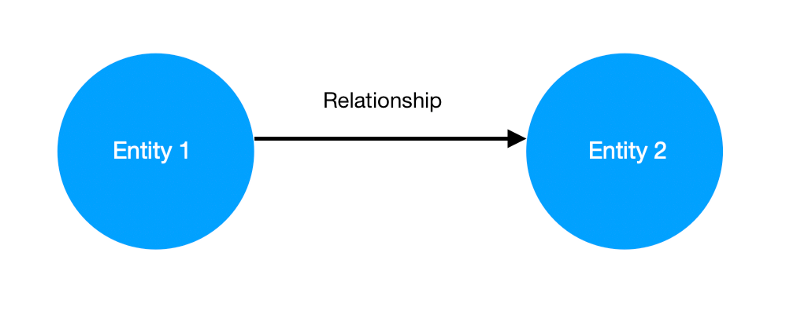

La Entidad 1 y la Entidad 2 se llaman nodos y la Relación se llama arista. Por supuesto, en un gráfico de conocimiento del mundo real, hay muchas entidades y relaciones y hay más de una forma de llegar a una entidad partiendo de otra.

Normalmente, este tipo de gráficos se modela con tríos, que son conjuntos de tres elementos como (sujeto, verbo, objeto), siendo el verbo la relación entre el sujeto y el objeto. Por ejemplo, (Londres, es_capital, Inglaterra).